Instagram has become one of the most popular social media platforms in recent years, with millions of users using it for various purposes such as promoting businesses, building portfolios, blogging, and creating different types of content. As Instagram keeps changing to improve itself for content creators and users, it affects the reach of our posts in the long run. Therefore, it's crucial for content creators to analyze the data of their Instagram reach to adapt to the changes and succeed on Instagram. This is where the use of Data Science in social media comes in. In this article, we will explore Instagram Reach Analysis using Python, which will help content creators to understand how to adapt to the changes on Instagram and predict their reach with Machine Learning. Whether you are a data science student or a content creator, this article will provide you with insights on how to use Instagram data for reach analysis.

In [3]:
# Importing necessary libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pygwalker as pyg
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("C:\\Users\\owner\\OneDrive\\Desktop\\Instagram_Data\\Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
# Checking for null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
# I find no null values
# Now to column insight
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Let's begin analyzing the reach of Instagram posts. Firstly, I will examine the distribution of impressions I have obtained from the home feed.

C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


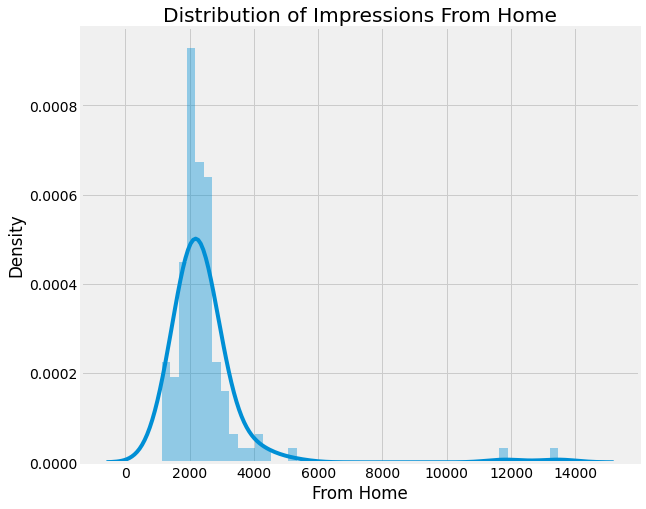

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions obtained from hashtags on Instagram indicate how many non-followers viewed my posts. By examining the hashtag impressions, I can conclude that it is not easy to get a significant number of non-followers to see my posts consistently. Let's now examine the distribution of impressions from hashtags.

C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


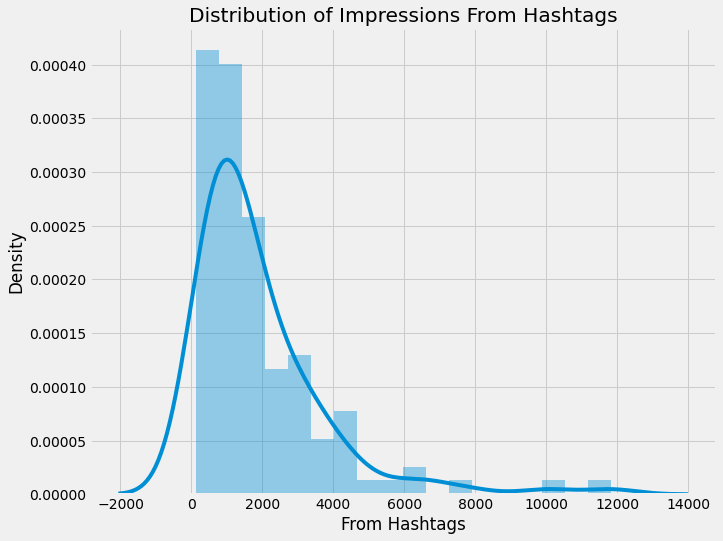

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags serve as a means of categorizing posts on Instagram and increasing their visibility to users interested in specific topics. Analyzing hashtag impressions shows that while not all posts receive a boost from hashtags, they do provide a way to reach new users. Next, let's explore the distribution of impressions from the Explore section of Instagram.

C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


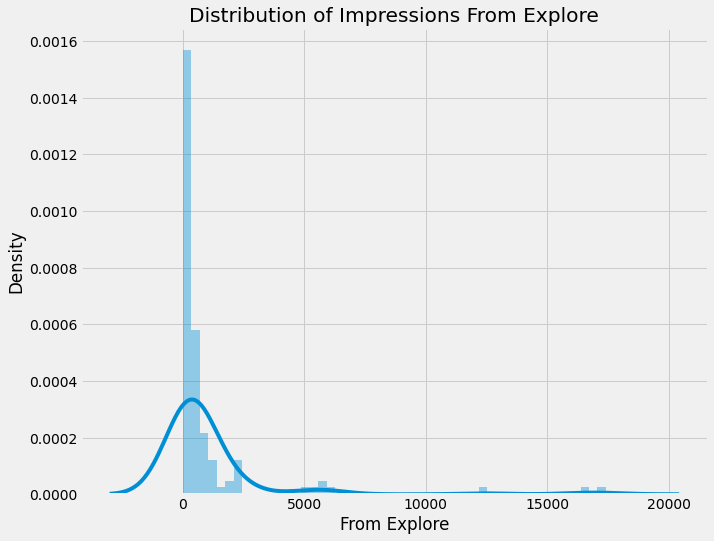

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram works as a recommendation system that suggests posts to users based on their interests and preferences. Observing the impressions received from the explore section indicates that Instagram doesn't highly recommend our posts to users. Although some posts have had a reasonable reach from this section, it's still quite low compared to the reach obtained from hashtags.

Next, let's examine the distribution of impressions I receive from different sources on Instagram, expressed as a percentage.

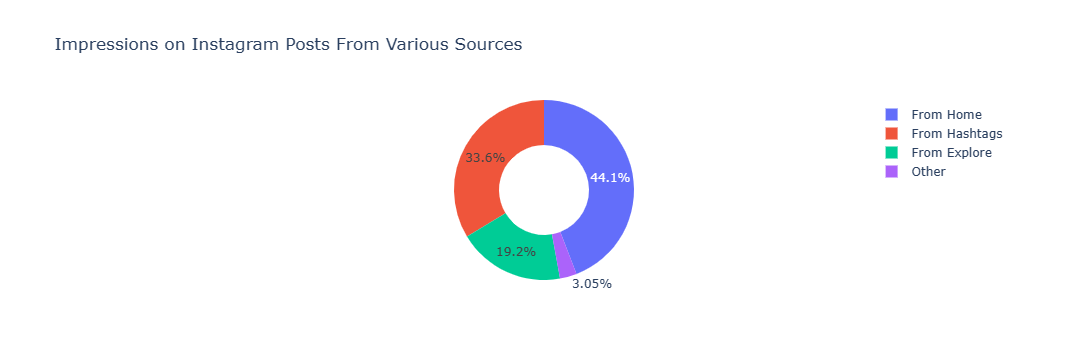

In [10]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

The donut plot depicted above illustrates that approximately half of the total reach is from my followers, followed by 38.1 per cent from hashtags, 9.14 per cent from the explore section, and 3.01 per cent from other sources.

Let's now delve into analyzing the content of my Instagram posts. To achieve this, we will be working with two columns of the dataset, namely "caption" and "hashtags," which will provide insights into the type of content I post on Instagram.

To begin with, we can create a wordcloud of the caption column, which will highlight the most frequently used words in the captions of my Instagram posts.

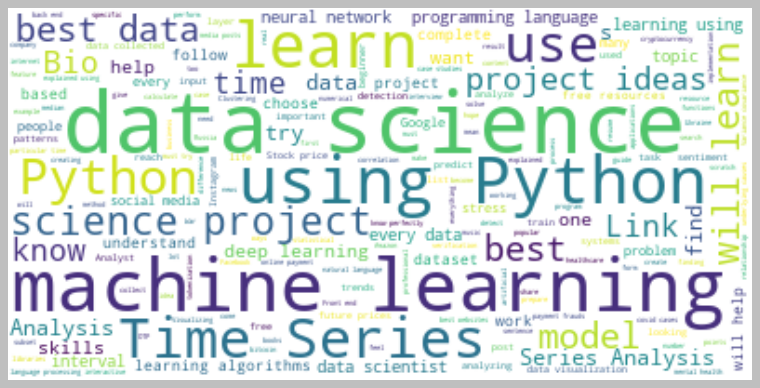

In [11]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next, we will generate a wordcloud of the hashtags column to visualize the frequently used hashtags in my Instagram posts.

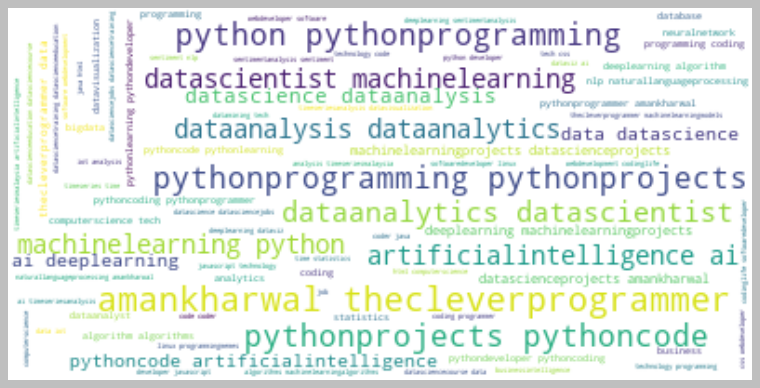

In [12]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

To identify the crucial factors that impact our Instagram reach, we will analyze the relationships between different variables. This analysis will also provide insights into how the Instagram algorithm operates.

Let's examine the correlation between the number of likes and impressions on my Instagram posts:

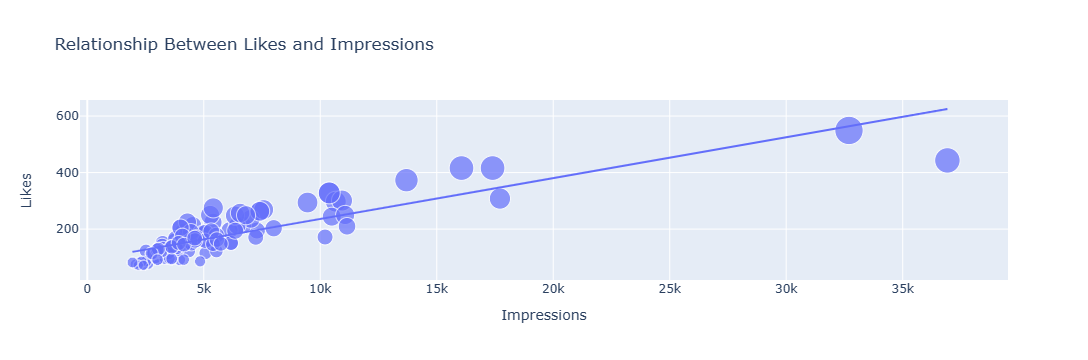

In [13]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

The number of likes on my Instagram posts shows a linear relationship with the reach I received. Let's now examine the correlation between the number of comments and the number of impressions on my Instagram posts:

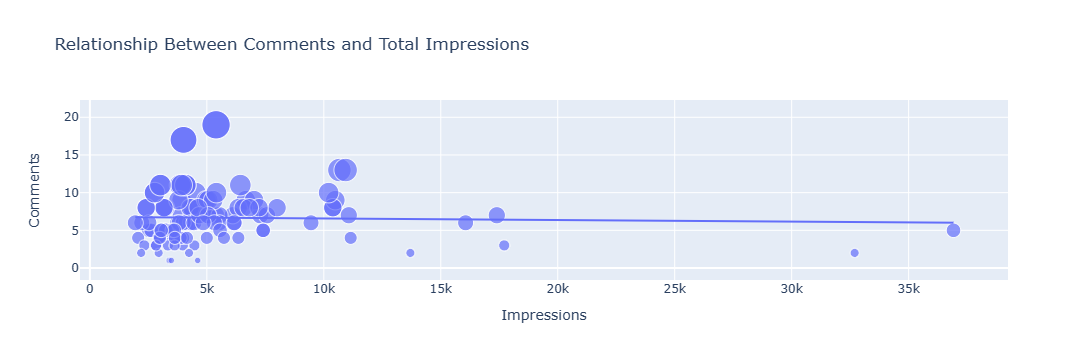

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

The relationship between the number of shares and the impressions received on Instagram can now be examined.

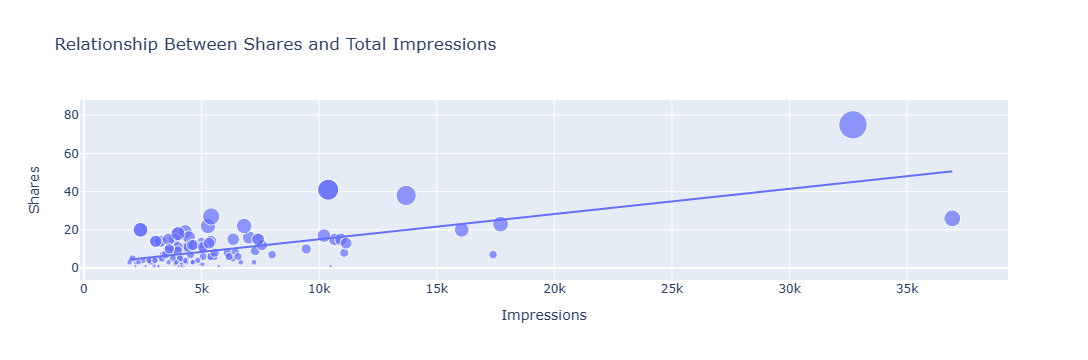

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

The relationship between the number of saves and the reach of a post on Instagram will now be examined.

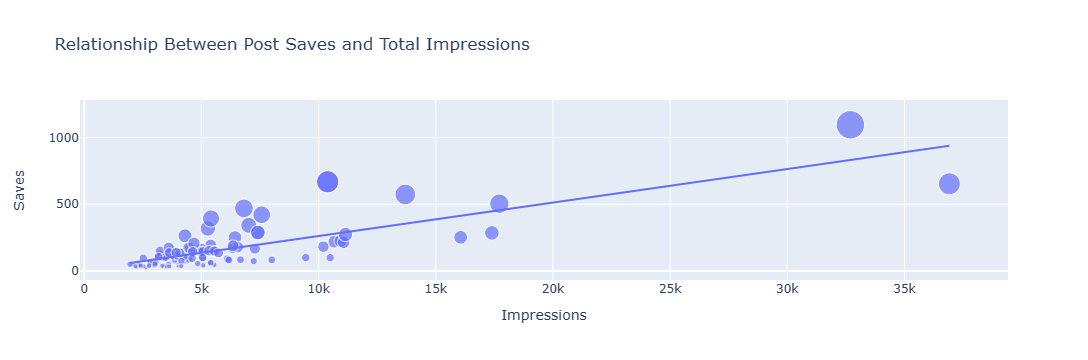

In [16]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Let's now examine the correlation between all the columns with the Impressions column.

In [17]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


It can be concluded that having more likes and saves can contribute to a higher reach on Instagram. Additionally, a higher number of shares can also increase reach, although a low number of shares will not have a significant impact on reach.

Based on the analysis, it can be inferred that obtaining more likes and saves can lead to a greater reach on Instagram. Furthermore, a larger number of shares can also result in increased reach, although a lower number of shares may not have a significant effect on reach.

In [18]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


The conversion rate of my Instagram account is 31%, which appears to be a high rate. 
Now, let's examine the correlation between the total profile visits and the number of followers gained from all profile visits.

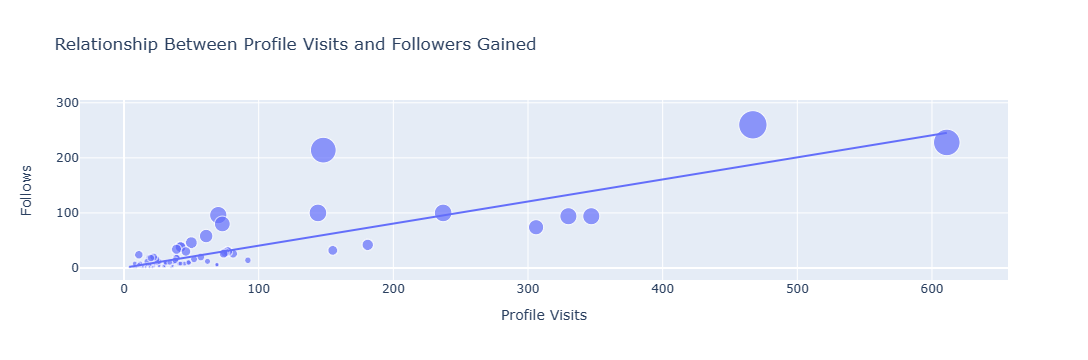

In [19]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

A linear relationship exists between the number of profile visits and the number of followers gained.

In this section, a machine learning model will be trained to predict the reach of an Instagram post. The data will be divided into training and test sets before model training.

In [20]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Here's how to use Python to train a machine learning model that predicts the reach of an Instagram post:

In [21]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8901164953643784

In [22]:
# Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model

# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12950.31557119])

In summary, this is the process for analyzing and predicting the reach of Instagram posts using machine learning in Python. For long-term success on Instagram, content creators must examine their reach data, which is where the application of Data Science in social media proves useful. I hope you found this article helpful for performing Instagram Reach Analysis using Python. If you have any questions, please feel free to ask them in the comments section below.